In [ ]:
import pandas as pd
import numpy as np
# Create a vector and matrix
vector = np.array([1, 2, 3])
matrix = np.array([[4, 5, 6], [7, 8, 9]])

# Vector addition
vector_add = vector + np.array([3, 2, 1])

# Matrix multiplication (dot product)
result = np.dot(vector, matrix.T)

print(result)

[32 50]


In [11]:
a = np.array([1, 2])
b = np.array([3, 4])

# Manual dot product
dot_manual = a[0]*b[0] + a[1]*b[1]  # = 1*3 + 2*4 = 11

# Using NumPy
dot_numpy = np.dot(a, b)

print(dot_manual)
print(dot_numpy)

11
11


In [8]:
import pandas as pd

df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


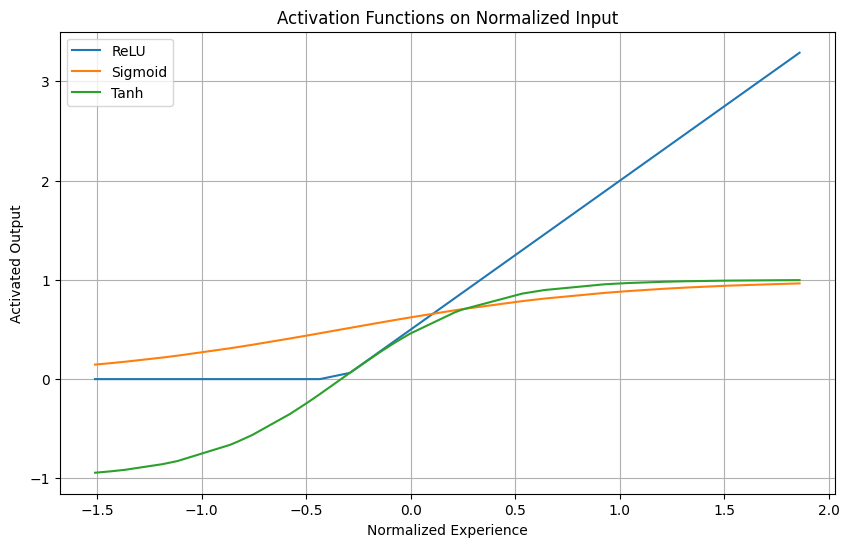

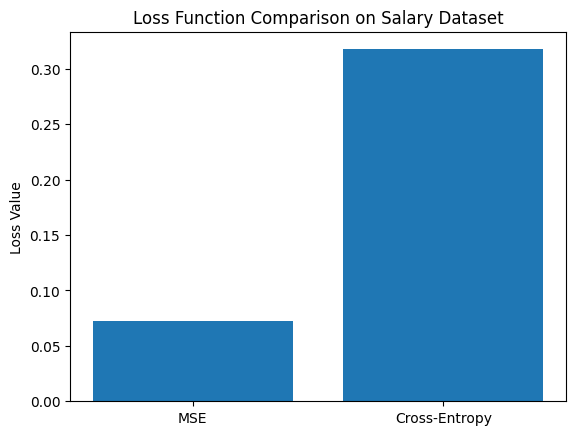

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature and target
X = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values

# Normalize for better numerical stability
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()

# -- 1. Vector and Matrix Operations --
X_vec = X_norm.flatten()
W = np.array([1.5])  # Example weight
b = 0.5              # Example bias

# Linear transformation (like a dense layer)
linear_output = X_vec * W + b

# -- 2. Manual Dot Product --
manual_dot = np.dot(X_vec[:5], W[0])  # use first 5 inputs

# -- 3. Activation Functions --
relu = np.maximum(0, linear_output)
sigmoid = 1 / (1 + np.exp(-linear_output))
tanh = np.tanh(linear_output)

# -- Plotting Activation Functions --
plt.figure(figsize=(10, 6))
plt.plot(X_vec, relu, label='ReLU')
plt.plot(X_vec, sigmoid, label='Sigmoid')
plt.plot(X_vec, tanh, label='Tanh')
plt.title('Activation Functions on Normalized Input')
plt.xlabel('Normalized Experience')
plt.ylabel('Activated Output')
plt.legend()
plt.grid(True)
plt.show()

# -- 4. Loss Comparison --

# Dummy prediction using linear output
y_pred = linear_output[:10]
y_true = y_norm[:10]

# MSE
mse = np.mean((y_true - y_pred) ** 2)

# Simulate Cross-Entropy: binarize salary (just for illustration)
y_bin = (y_true > 0).astype(int)
y_pred_bin = 1 / (1 + np.exp(-y_pred))  # sigmoid to convert to probability
eps = 1e-10
ce = -np.mean(y_bin * np.log(y_pred_bin + eps) + (1 - y_bin) * np.log(1 - y_pred_bin + eps))

# Plotting Losses
plt.bar(['MSE', 'Cross-Entropy'], [mse, ce])
plt.title("Loss Function Comparison on Salary Dataset")
plt.ylabel("Loss Value")
plt.show()